In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [3]:
#loading the dataset into the notebook
red_wine=pd.read_excel(r"C:\Users\DELL\Downloads\winequality.xlsx") 
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# The Correlation Plot

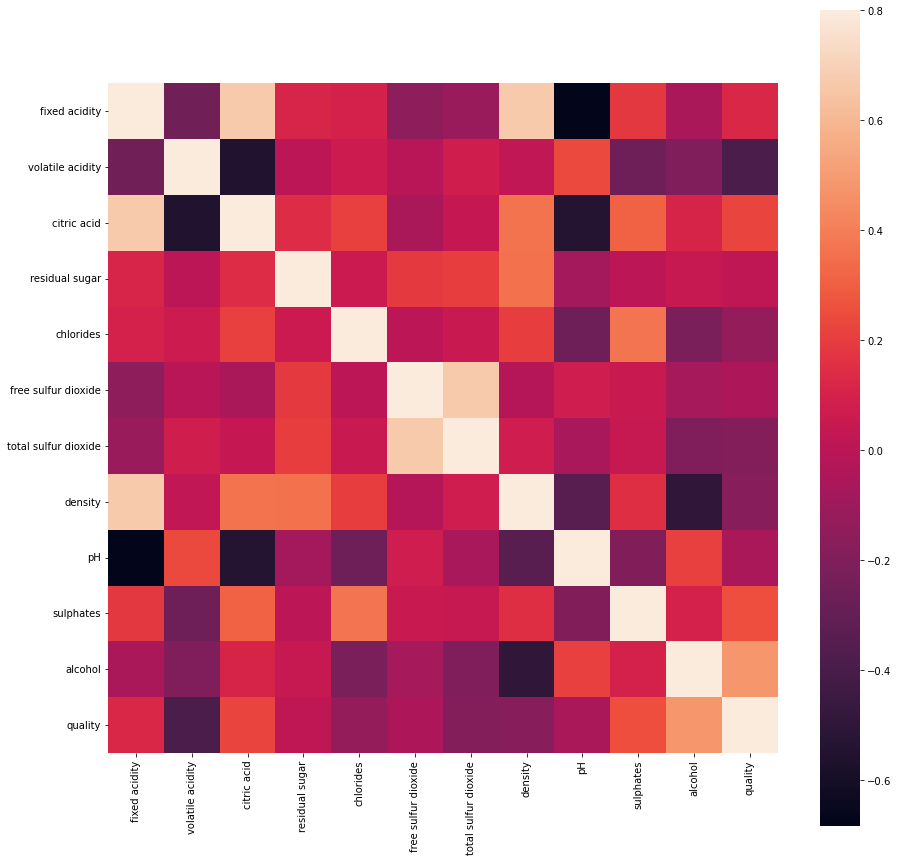

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
C_mat = red_wine.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

# Dependence on Skewness

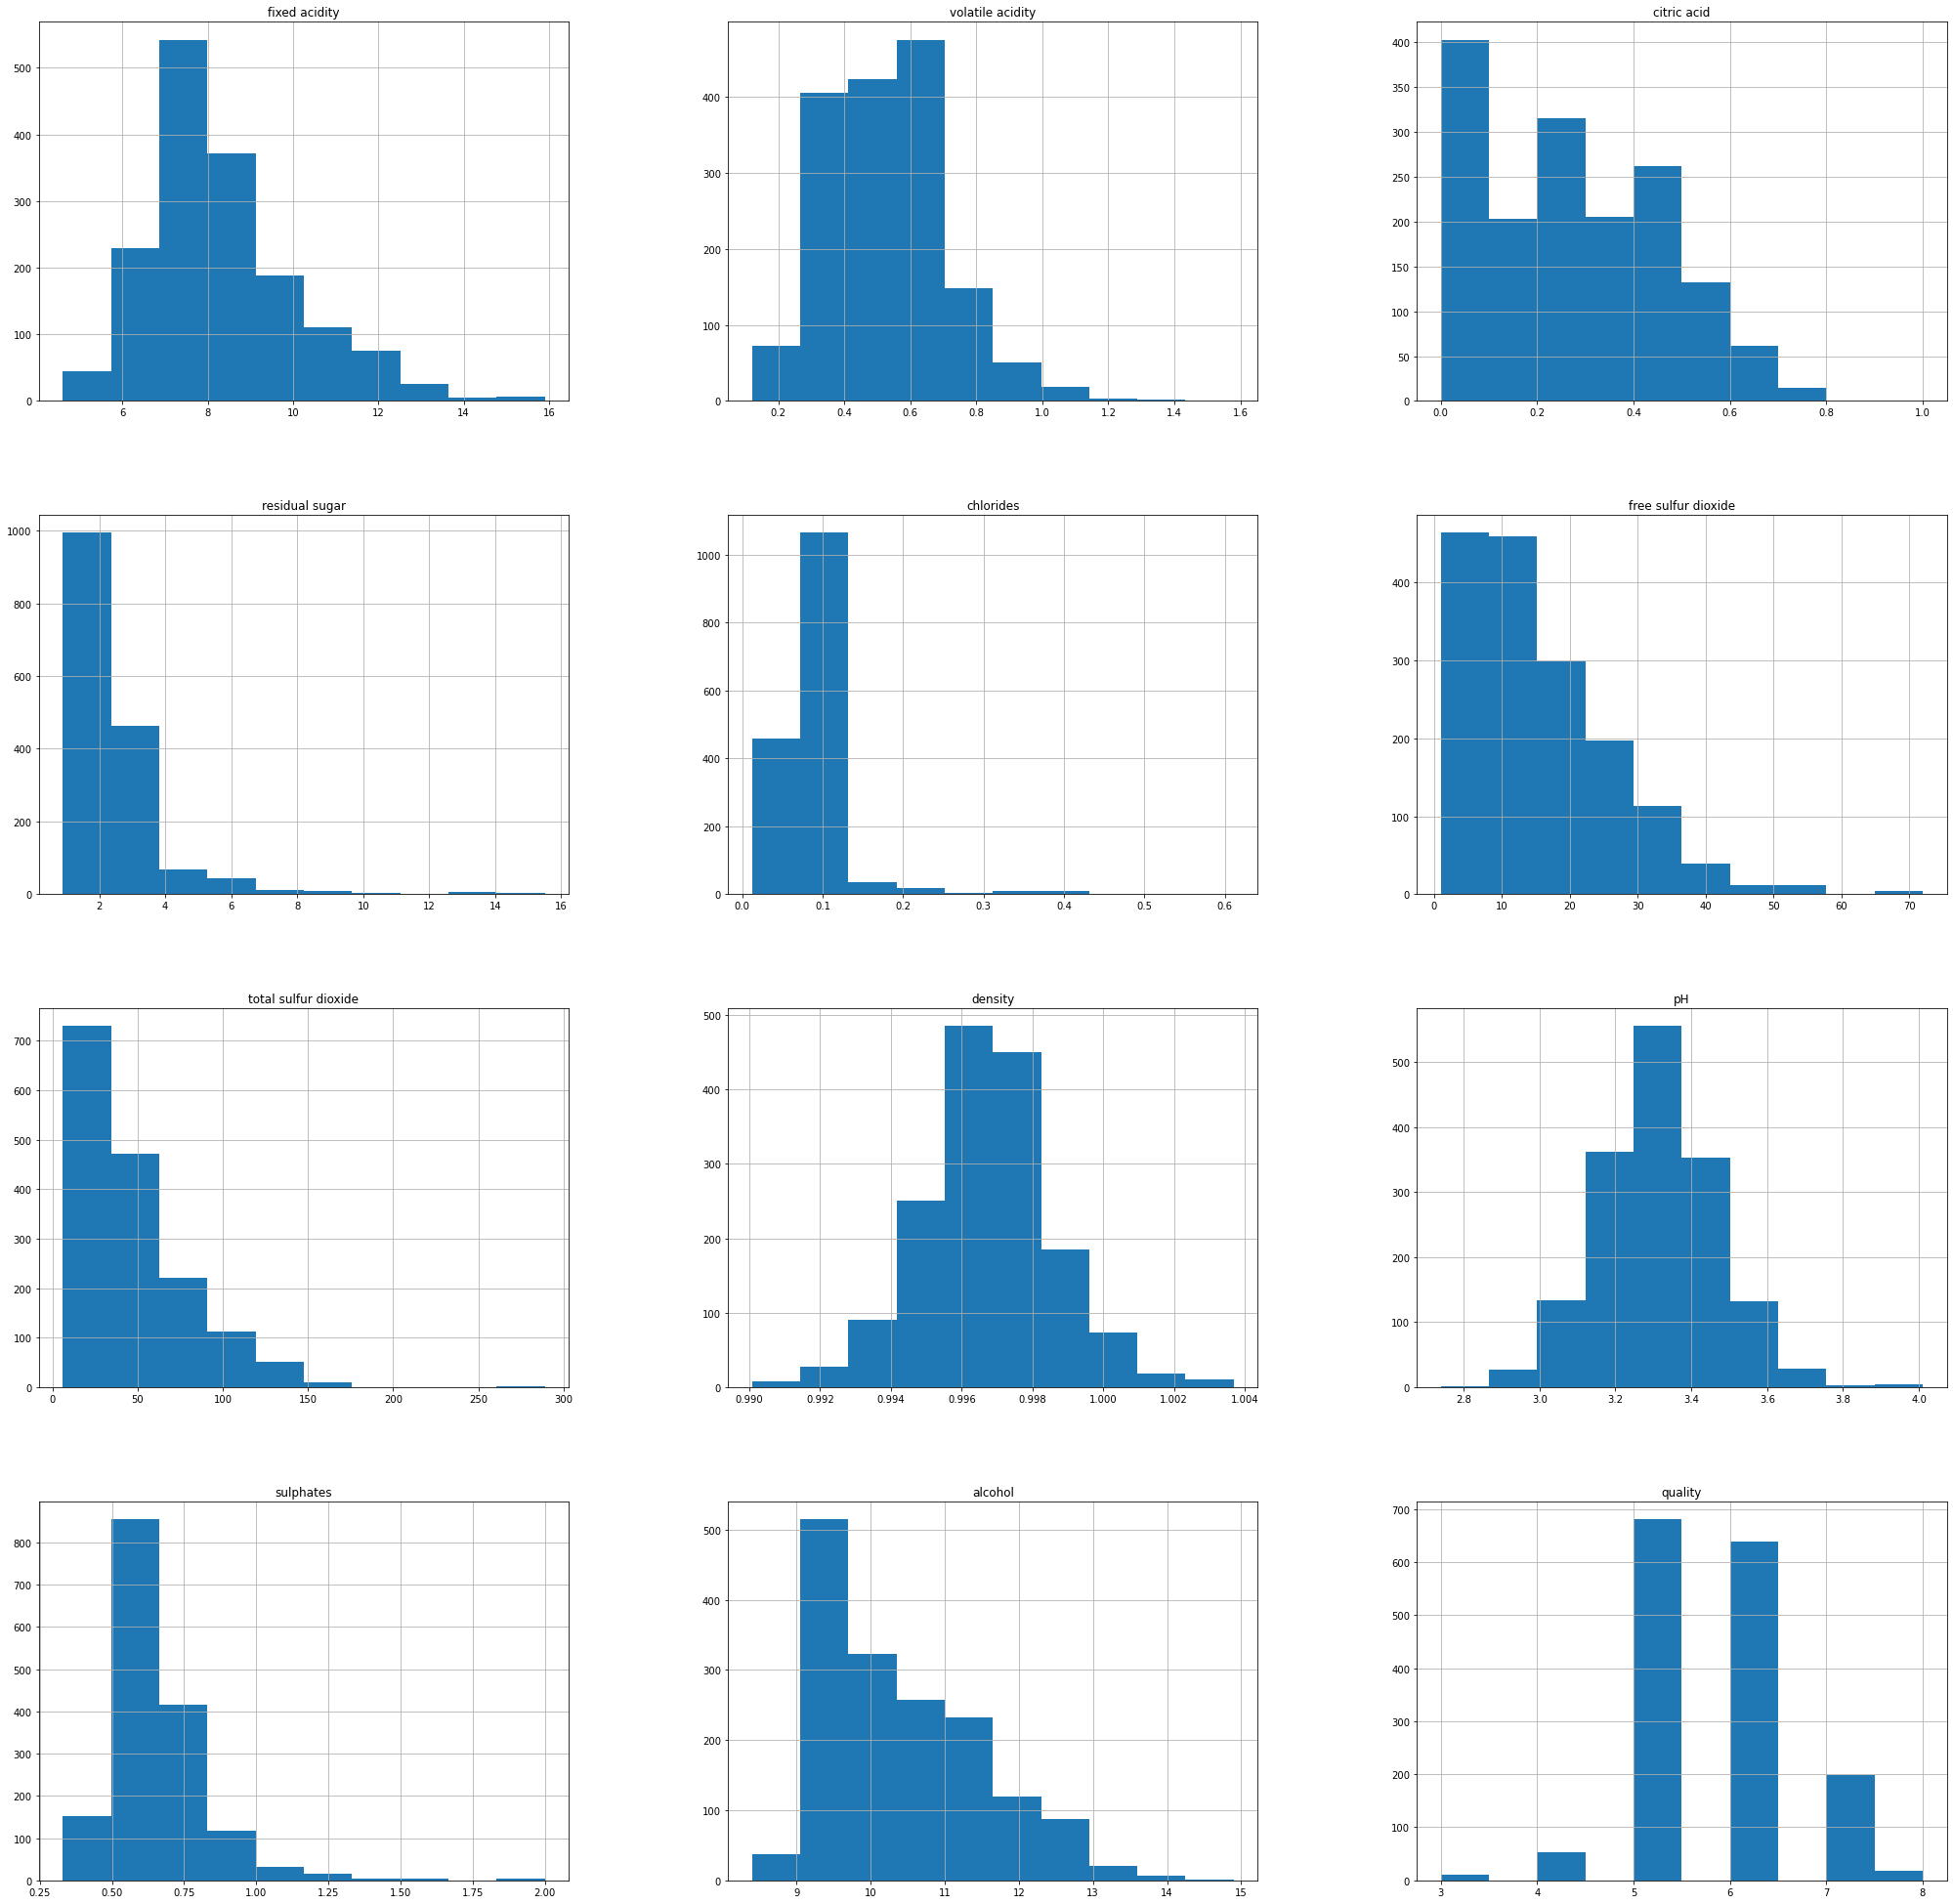

In [5]:
red_wine.hist(figsize = (35,35))
plt.show()

# If we analyze closely we can find that ‘citric acid’ and ‘volatile acidity’ have skewed distributions.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


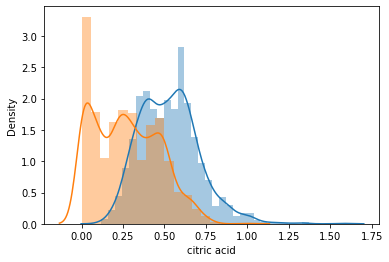

In [6]:
import seaborn as sns
sns.distplot(red_wine['volatile acidity']);
sns.distplot(red_wine['citric acid']);

# It has evident that the skewed distribution can be converted to a normal distribution using the logarithmic function.

C:\Users\DELL\AppData\Local\Temp/ipykernel_8576/2636056562.py:3: RuntimeWarning: divide by zero encountered in log
  red_wine['new_citric acid']=np.log(red_wine['citric acid'].values)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


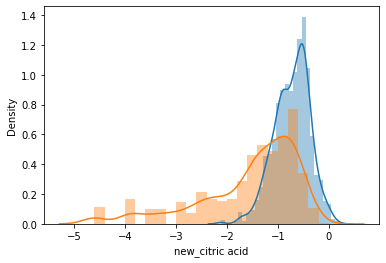

In [7]:
import numpy as np
red_wine['new_volatile acidity']=np.log(red_wine['volatile acidity'].values)
red_wine['new_citric acid']=np.log(red_wine['citric acid'].values)
red_wine = red_wine[np.isfinite(red_wine['new_citric acid'])]
sns.distplot(red_wine['new_volatile acidity']);
sns.distplot(red_wine['new_citric acid']);

# Numeric feature

# pair plot

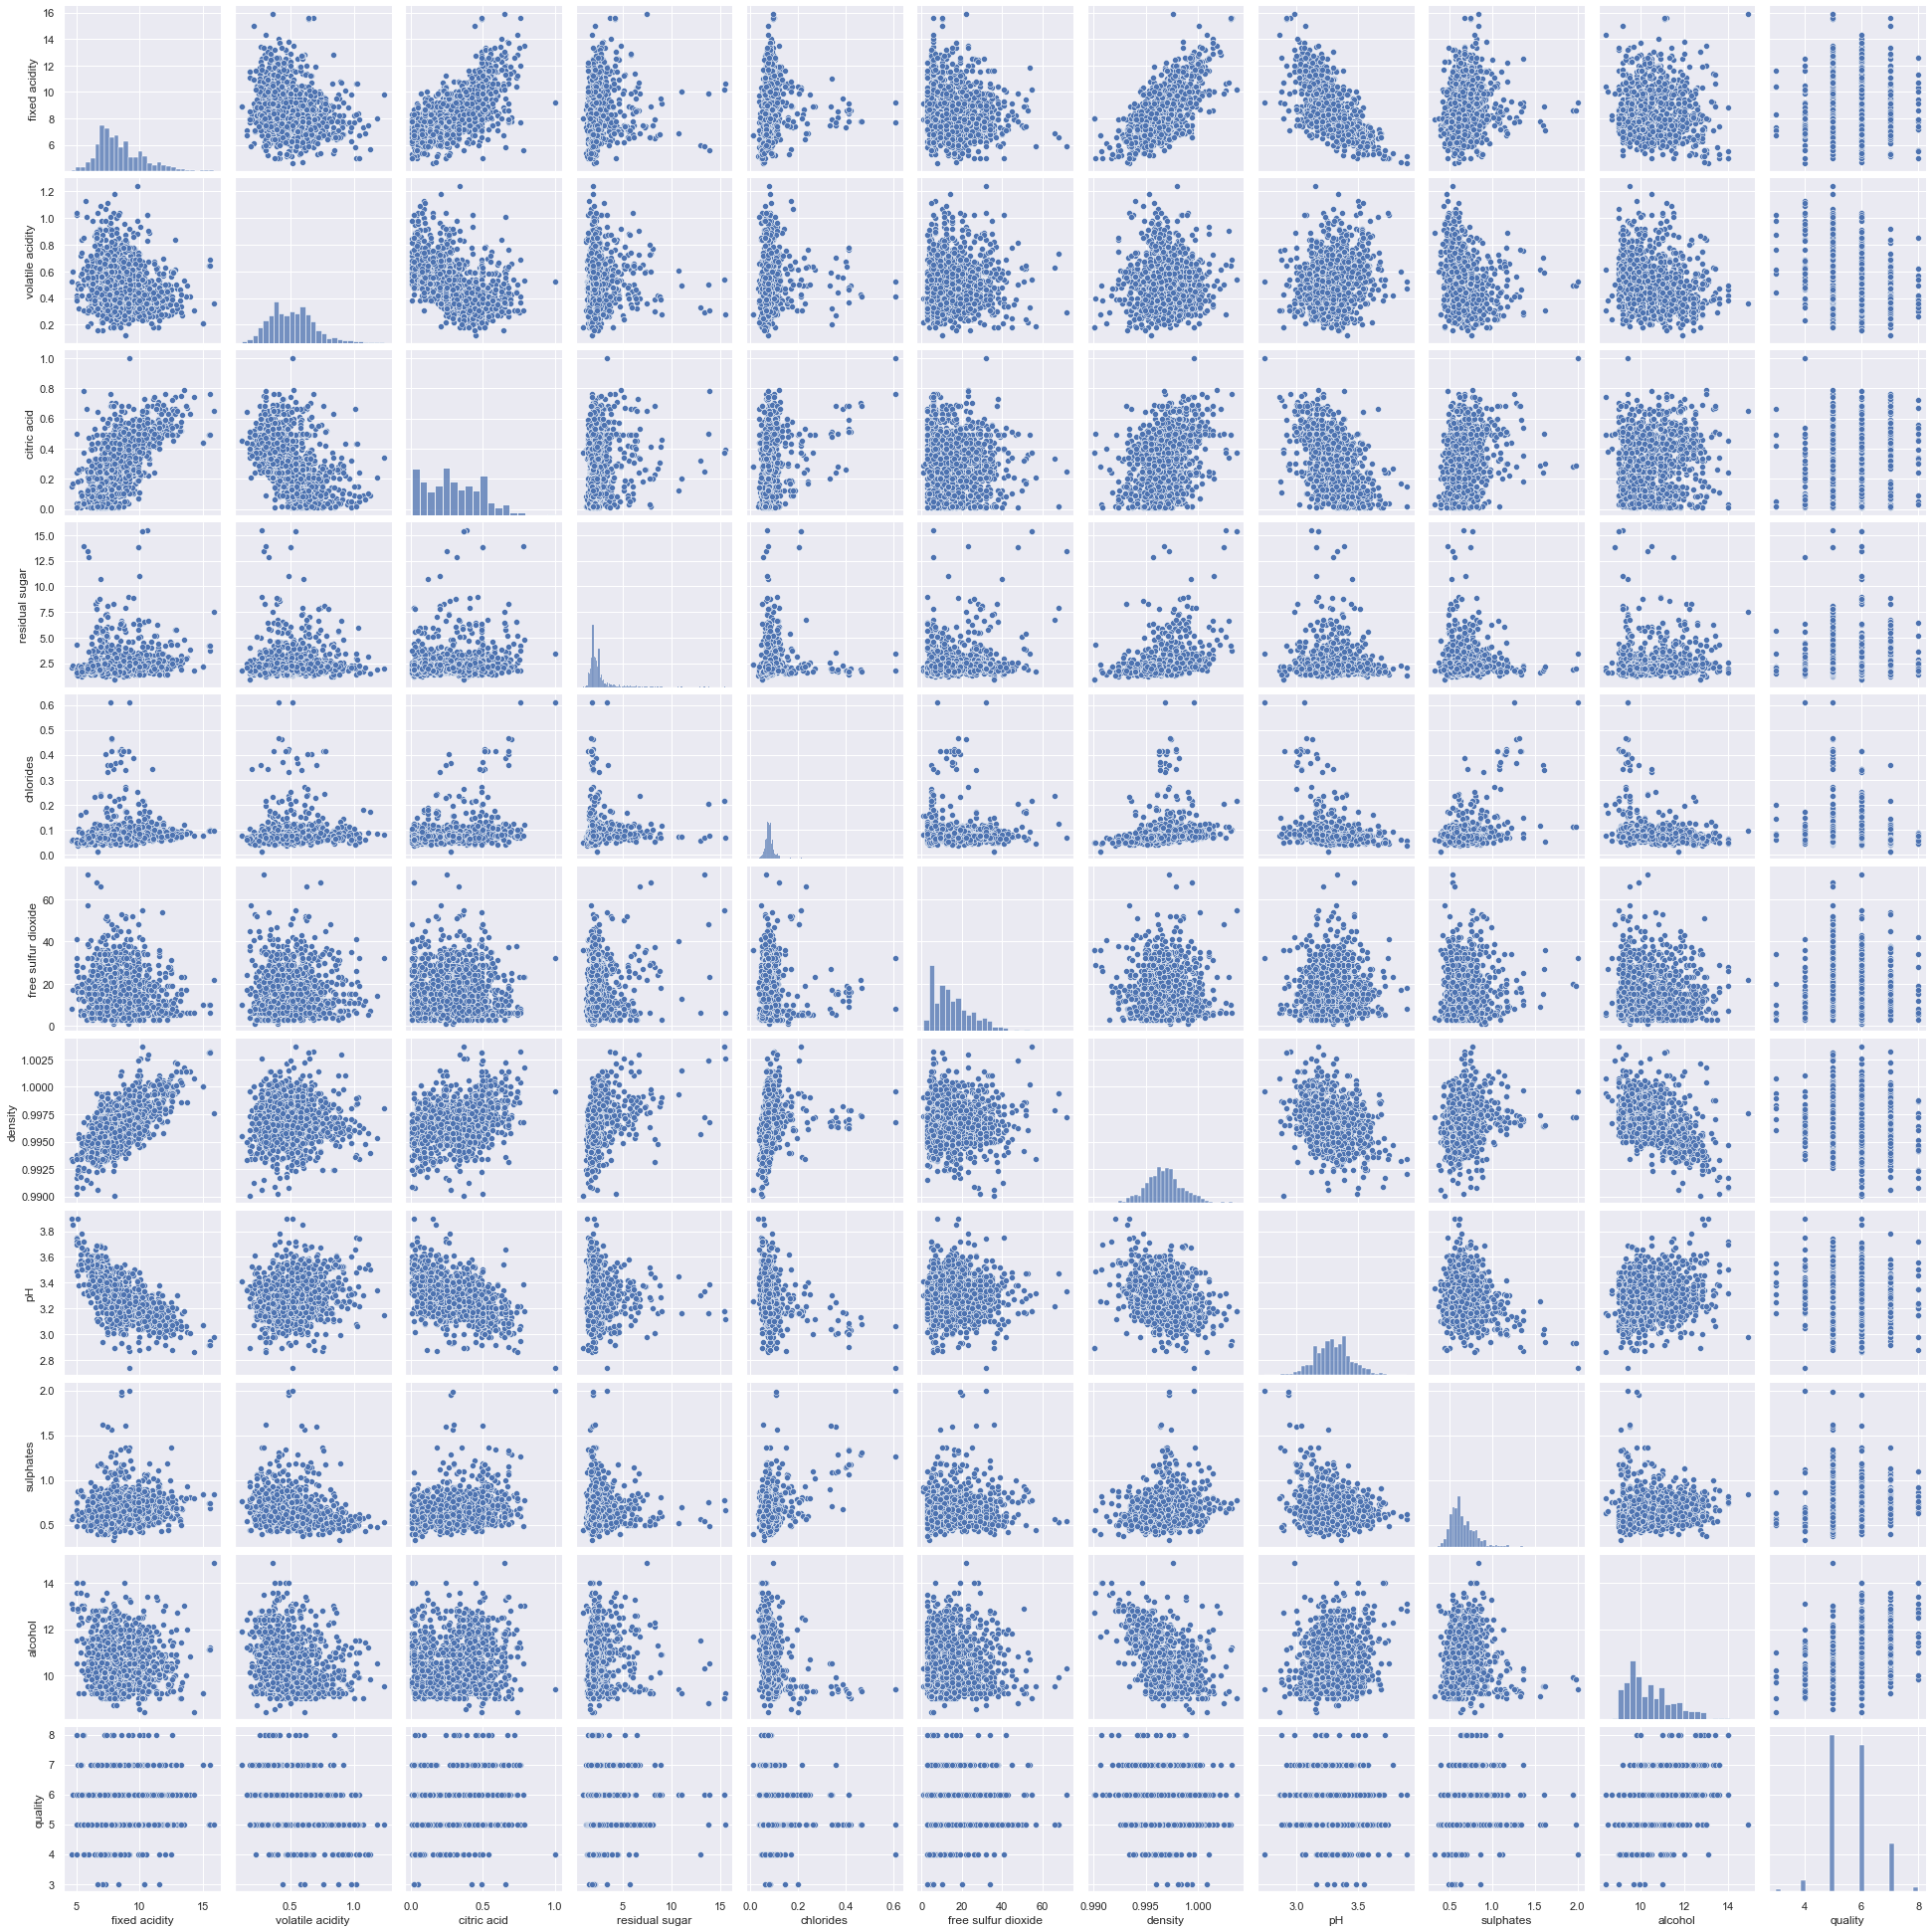

In [8]:
import seaborn as sns
sns.set()
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol',
       'quality']
sns.pairplot(red_wine[cols], height = 2.5)
plt.show();

# scatter plot of the pH and alcohol content variables, with points colored by wine quality.

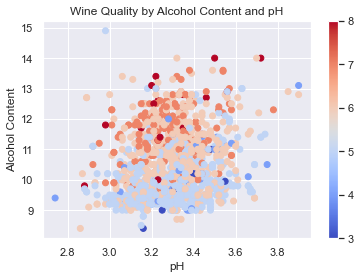

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot of alcohol content vs. pH, colored by wine quality
plt.scatter(x=red_wine['pH'], y=red_wine['alcohol'], c=red_wine['quality'], cmap='coolwarm')
plt.xlabel('pH')
plt.ylabel('Alcohol Content')
plt.title('Wine Quality by Alcohol Content and pH')
plt.colorbar()
plt.show()


# Categorical Features

# Box plot

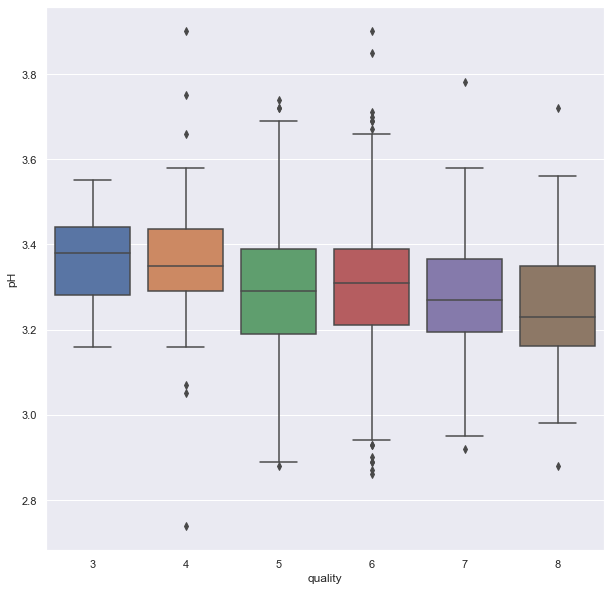

In [10]:
data = pd.concat([red_wine['quality'], red_wine['pH']], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='quality', y="pH", data=data)

# Bar plot

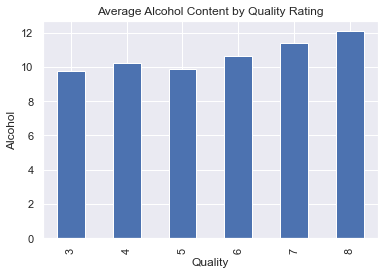

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar plot of mean alcohol content by quality rating
quality_alcohol = red_wine.groupby('quality')['alcohol'].mean()
quality_alcohol.plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Average Alcohol Content by Quality Rating')
plt.show()


# classification tasks

# random forest classifier

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Separate the target variable from the features
X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Random Forest Classifier with default parameters
rfc = RandomForestClassifier()

# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the performance of the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.70      0.82      0.75       121
           6       0.63      0.68      0.65       118
           7       0.79      0.44      0.57        43
           8       0.00      0.00      0.00         3

    accuracy                           0.67       294
   macro avg       0.42      0.39      0.39       294
weighted avg       0.66      0.67      0.65       294



C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# feature selection to improve accuracy

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel


# Separate the target variable from the features
X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

# Set the feature names
feature_names = X.columns

# Feature Selection
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X = model.transform(X)

# Set the feature names of the selected features
selected_feature_names = feature_names[model.get_support()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

# Fit the random forest classifier to the training data
clf.fit(X_train, y_train)

# Predict the quality of the red wine in the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Improved accuracy for random forest is:", accuracy)


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Improved accuracy for random forest is: 0.9013605442176871


# decision tree

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate the target variable from the features
X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)


# Fit the decision tree classifier to the training data
dtc.fit(X_train, y_train)

# Predict the quality of the red wine in the test set
y_pred = dtc.predict(X_test)

# Calculate the accuracy of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for decision tree is:", accuracy)


Accuracy for decision tree is: 0.6156462585034014


# feature selection to improve accuracy for decision tree

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


# Separate the target variable from the features
X = red_wine.drop('quality', axis=1)
y = red_wine['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
dt_class = DecisionTreeClassifier(random_state=42)

# Initialize the feature selection transformer
sfm = SelectFromModel(dtc, threshold=0.1, prefit=False)

# Fit the feature selection transformer to the training data
X_train_transformed = sfm.fit_transform(X_train, y_train)

# Get the feature names of the selected features
selected_features = X.columns[sfm.get_support()]

# Fit the decision tree classifier to the selected features
dt_class.fit(X_train_transformed, y_train)

# Transform the test data using the same feature selection transformer
X_test_transformed = sfm.transform(X_test)

# Predict the quality of the red wine in the test set
y_pred = dt_class.predict(X_test_transformed)

# Calculate the accuracy of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
print("improved Accuracy for decision tree is :", accuracy)


Accuracy: 0.6462585034013606


# X-boost 

In [41]:
!pip install xgboost

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb


# Separate the target variable from the features
X = red_wine.drop('quality', axis=1)

y = red_wine['quality']
lble = LabelEncoder()
y = lble.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier()

# Fit the XGBoost model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for this model is:", accuracy)


Accuracy for this model is: 0.675


# ROC-AUC curve

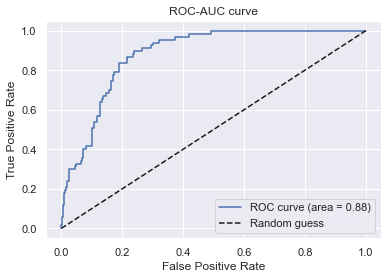

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the wine quality dataset
#wine = pd.read_csv('winequality-red.csv')

# Split the dataset into features and target variable
X = red_wine.iloc[:,:-1]
y = red_wine['quality']

# Convert the target variable into a binary classification task
y = np.where(y > 6, 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate and true positive rate for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend(loc='best')
plt.show()
